# Disease Prediction using Machine Learning

Based on the dataset made available in https://www.geeksforgeeks.org/disease-prediction-using-machine-learning/. Only the data was used, the implementation was not based on the solution provided.

### Library Import

In [55]:
### Library imports
import pandas as pd # Import Pandas library for CSV reading
import matplotlib as mpl # Import Matplotlib library for plot's customization
import numpy as np # Import numpy for number manipulation

### Data Processing

Number of symptoms: 132
Number of train cases: 4920
Number of test cases: 42
NaN values in train set: 4920
NaN values in test set: 4920
NaN values in train set (after filtering): 0
Number of possible prognosis: 41


<Axes: title={'center': 'Prognosis Count'}, xlabel='Possible Prognosis'>

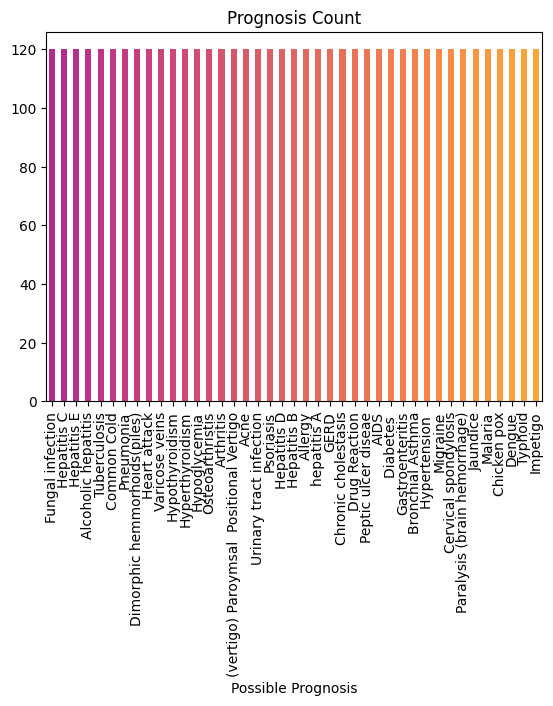

In [60]:
train_data_path = "./data/Training.csv" # Train CSV path declaration
test_data_path = "./data/Testing.csv" # Test CSV path declaration

train_data_df = pd.read_csv(train_data_path) # CSV reading using Pandas
test_data_df = pd.read_csv(test_data_path) # CSV reading using Pandas

print("Number of symptoms:", test_data_df.shape[1] - 1) # Number of symptoms evaluated (excludes the last collumn that contains the result)
print("Number of train cases:", train_data_df.shape[0]) # Number of train cases
print("Number of test cases:", test_data_df.shape[0]) # Number of test cases
print("NaN values in train set:", train_data_df.isnull().sum().sum()) # Number of values NaN in the train data (identified as the last collumn)
print("NaN values in test set:", train_data_df.isnull().sum().sum()) # Number of values NaN in the test data

train_data_df = train_data_df.drop(train_data_df.columns[train_data_df.shape[1] - 1], axis=1) # Droping column causing the NaN values
print("NaN values in train set (after filtering):", train_data_df.isnull().sum().sum()) # Number of values NaN in the train data (after processing)

prognosis_list = list(train_data_df['prognosis'].unique()) # Create a list of the possible prognosis
prognosis_num = len(prognosis_list) # Counts the number of possible prognosis
print("Number of possible prognosis:", prognosis_num) # Shows the number of possible prognosis

# Inserts into the train data dataframe a new column that contains a code for a certain disease instead of the name
train_prognosis_codes = []
for prog in train_data_df['prognosis']:
    prog_code = prognosis_list.index(prog)
    train_prognosis_codes.append(prog_code)
train_data_df.insert(train_data_df.shape[1], "prognosis_code", train_prognosis_codes)

# Inserts into the test data dataframe a new column that contains a code for a certain disease instead of the name
test_prognosis_codes = []
for prog in test_data_df['prognosis']:
    prog_code = prognosis_list.index(prog)
    test_prognosis_codes.append(prog_code)
test_data_df.insert(test_data_df.shape[1], "prognosis_code", test_prognosis_codes)

color = mpl.colormaps['plasma'](np.linspace(.4, .8, prognosis_num)) # Create the color map to use in the plotting process
train_data_df["prognosis"].value_counts().plot(kind="bar", color=color, title="Prognosis Count", xlabel="Possible Prognosis") # Display a bar plot of the diagnosis in the train dataset